#  **NLP Assignment 2: Application of NLP Methods**

The following is an attempt to train a logistic regression model to predict the political affiliations of a particular reddit comment. The methods deployed are sentiment analysis (in the form of calculating VAD and sensorimotor norm scores for each comment in the dataset) and logistic regression.  

In [196]:
# Importing relevant packages for the project
import praw
import pandas as pd
import seaborn as sns

In [197]:
# Importing the final dataframe from the previous assignment and dropping rows containing NaN values
vad_df = pd.read_pickle('Final_Data2.pkl').dropna()

In [198]:
vad_df = vad_df.reset_index(drop=True)

In [199]:
vad_df.subreddit.value_counts()

subreddit
uspolitics    903
ukpolitics    855
Labour        838
tories        785
democrats     782
Republican    753
Name: count, dtype: int64

### VAD Interactive Data Visualisation

In [200]:
# Remove unecessary columns from the VAD dataframe for the data visualisation
vad_lemma = vad_df[['subreddit','lemmatized_titles','valence','arousal','dominance']]

In [201]:
# Install the plotly and matplotlib packages needed for the following data visualisation
!pip install plotly
import plotly.express as px
!pip install jupyterlab "ipywidgets>=7.5"
import matplotlib.pyplot as plt

In [202]:
# Creating an interactive data visualisation for the VAD scores of all the reddit posts in our political dataset 
fig = px.scatter_3d(vad_lemma, x='valence', y='arousal', z='dominance', color = 'subreddit', hover_data = [vad_lemma.lemmatized_titles])
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))



fig.show()

### Adding Sensorimotor Norms

The Lancaster sensorimotor norms (Lynott et al., 2019) are a collection of approximately 40,000 English words and their corresponding sensorimotor strength across six perceptual modalities (senses) and five action effectors (parts of the body). Sensorimotor information is important in cognitive processing, and in the context of this project may help to shed new understanding on how political ideology is felt and expressed as a lived experience in the body.  

In [203]:
# Loading in the Lancaster sensorimotor norms
sm = pd.read_excel('sensorimotor2.xlsx', index_col=0)

In [204]:
sm

,auditory,gustatory,haptic,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known
word,,,,,,,,,,,,
creme caramel,0.473684,5.000000,1.947368,0.789474,2.421053,3.947368,0.000000,1.166667,2.111111,4.500000,0.333333,0.948684
pasta,0.250000,5.000000,2.312500,0.562500,3.375000,3.687500,0.000000,1.789474,1.736842,4.421053,0.578947,1.000000
pina colada,0.117647,5.000000,2.941176,1.352941,4.235294,4.470588,0.000000,1.450000,2.000000,4.450000,0.900000,1.000000
pizza,0.411765,5.000000,1.941176,0.705882,4.411765,4.000000,0.000000,1.894737,2.421053,4.263158,0.684211,1.000000
sugary,0.315789,4.947368,1.105263,1.526316,1.631579,1.894737,0.000000,0.350000,1.550000,4.050000,0.150000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,2.000000,0.000000,0.904762,0.904762,0.809524,3.904762,1.523810,1.428571,2.333333,1.523810,1.285714,1.000000
zoological,1.586207,0.000000,0.310345,0.034483,0.517241,2.551724,0.350000,1.000000,1.900000,0.150000,0.250000,0.953125
zoologically,1.066667,0.000000,0.200000,0.133333,0.466667,2.266667,0.352941,0.529412,1.823529,0.470588,0.529412,0.800000


In [205]:
# Turn the lemmatized_titles column from the vad_df into a list of lists
lemmas = vad_df.lemmatized_titles.tolist()

In [206]:
# Create a list to store the sensorimotor scores
sm_scores = []

# Forloop to go through our lemmas list of lists and calculate the sensorimotor norm score of each reddit comment
for i in lemmas:
    sm_words = []
    try:
        for j in i:
            if j.lower() in sm.index:
                sm_words.append(j.lower())
        sm_ = sm.loc[sm_words]
        sm_scores.append(sm_.mean())
    except:
        sm_scores.append(pd.Series([np.nan for i in range(3)]))

In [207]:
sm_scores = pd.DataFrame(sm_scores)

In [208]:
sm_scores.head()

,auditory,gustatory,haptic,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known
0,1.680921,0.236842,0.680921,0.978618,0.289474,2.929276,2.175000,2.550000,2.700000,1.600000,1.350000,1.000000
1,1.313800,0.219491,1.177705,1.123057,0.223489,2.743536,0.694389,1.666106,2.096159,0.904804,0.748647,0.975310
2,1.809734,0.131360,1.564566,0.830601,0.180389,3.598113,0.922173,1.993811,2.782359,0.864327,0.968470,0.995363
3,1.686556,0.237375,0.694067,1.202222,0.257722,2.969378,0.738569,1.370596,2.648496,1.420489,0.752033,0.985337
4,2.182986,1.255903,1.267014,1.460764,1.284722,3.062500,1.261508,2.030159,2.624405,2.918849,1.583929,0.994048


In [209]:
#Show that the sensorimotor norms dataframe has the same number of columns as the original VAD dataframe
print(len(vad_df))
print(len(sm_scores))

4916
4916


In [210]:
# Concatenating the two dataframes together along the column axis
political_reddit = pd.concat([vad_df, sm_scores], axis=1)

In [211]:
political_reddit

,title,user,text,url,score,num_comments,subreddit,lemmatized_titles,valence,arousal,...,haptic,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known
0,GO. VOTE.,throwawayfetishlord,,https://www.reddit.com/r/ukpolitics/comments/6...,19629,1817,ukpolitics,"[go, vote]",0.621495,0.634749,...,0.680921,0.978618,0.289474,2.929276,2.175000,2.550000,2.700000,1.600000,1.350000,1.000000
1,"@jeremycorbyn - Monday, the @Conservatives spe...",Anyales,,https://twitter.com/jeremycorbyn/status/880328...,16019,1882,ukpolitics,"[jeremycorbyn, monday, conservative, spent, £1...",0.552212,0.502542,...,1.177705,1.123057,0.223489,2.743536,0.694389,1.666106,2.096159,0.904804,0.748647,0.975310
2,Tim Farron warns of win for terrorists if web ...,ErsatzEmu,,https://www.theguardian.com/politics/2017/jun/...,14927,736,ukpolitics,"[tim, farron, warns, win, terrorist, web, made...",0.507532,0.675129,...,1.564566,0.830601,0.180389,3.598113,0.922173,1.993811,2.782359,0.864327,0.968470,0.995363
3,Looks like we'll be sending Brussels the Conse...,sam11233,,https://www.reddit.com/r/ukpolitics/comments/6...,13580,304,ukpolitics,"[look, like, 'll, sending, brussels, conservat...",0.639866,0.506754,...,0.694067,1.202222,0.257722,2.969378,0.738569,1.370596,2.648496,1.420489,0.752033,0.985337
4,Matt Hancock praises free school meals before ...,bottish,,https://www.theneweuropean.co.uk/brexit-news/w...,10782,803,ukpolitics,"[matt, hancock, praise, free, school, meal, re...",0.759346,0.508405,...,1.267014,1.460764,1.284722,3.062500,1.261508,2.030159,2.624405,2.918849,1.583929,0.994048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,74.2 million people in the USA have not had a ...,SnooBooks5387,,https://expose-news.com/2022/07/03/157million-...,576,157,Republican,"[74.2, million, people, usa, single, dose, cov...",0.619242,0.604447,...,0.975536,1.065269,0.388753,2.931418,0.448579,1.389672,2.108268,1.336363,0.524396,0.996732
4912,Vanderbilt University suspends gender affirmat...,Beliavsky,,https://nypost.com/2022/10/08/vanderbilt-unive...,570,17,Republican,"[vanderbilt, university, suspends, gender, aff...",0.464953,0.593375,...,0.972500,1.209211,0.313816,3.319605,1.071988,1.626182,2.736959,1.749783,1.258204,0.994118
4913,Nashville school shooter Audrey Hale identifie...,intelligentreviews,,https://nypost.com/2023/03/27/nashville-school...,488,186,Republican,"[nashville, school, shooter, audrey, hale, ide...",0.501100,0.599914,...,1.002971,0.770478,0.246414,3.426025,1.230428,2.086181,2.779904,1.451914,1.336728,0.968946
4914,“Proud Democrat” accidentally says the quiet p...,Interesting_Flow730,,https://www.reddit.com/gallery/14mlpkm,472,161,Republican,"[“, proud, democrat, ”, accidentally, say, qui...",0.574766,0.475329,...,0.526615,1.313918,0.177736,2.040300,0.615894,1.002165,2.609215,2.059524,0.604947,0.996599


In [212]:
len(political_reddit)

4916

In [213]:
# Pickling the data to save having to rerun it every time
political_reddit.to_pickle('Political_Reddit.pkl')

## Predicting Whether a Reddit Comment is Left or Right Leaning Using Logistic Regression

In [214]:

import seaborn as sns
sns.set()
import numpy as np
import random

# Scikit learn is a machine learning library that contains the regression algorithms needed for this project
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [215]:
# Let's see what groups we have reddit comments from
political_reddit['subreddit'].value_counts()

subreddit
uspolitics    903
ukpolitics    855
Labour        838
tories        785
democrats     782
Republican    753
Name: count, dtype: int64

In [216]:
# Decision was made to focus on just the UK Labour/Conservative divide
lab_con = political_reddit[(political_reddit['subreddit'] == 'Labour') | (political_reddit['subreddit'] == 'tories')].reset_index(drop = True)

In [217]:
lab_con['subreddit'].value_counts(0)

subreddit
Labour    838
tories    785
Name: count, dtype: int64

In [218]:
# Forloop to assign 0 to Labour comments and 1 to Conservate comments. These values are stored in a list called party_cats
party_cats = []

for i in lab_con['subreddit']:
    if i == 'Labour':
        party_cats.append(0)
    elif i == 'tories':
        party_cats.append(1)

lab_con['binary'] = party_cats

In [219]:
lab_con

,title,user,text,url,score,num_comments,subreddit,lemmatized_titles,valence,arousal,...,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known,binary
0,46 years!,javaxcore,,https://i.redd.it/15p80niwx6061.jpg,3054,256,Labour,"[46, year]",0.467290,0.370497,...,0.777778,0.166667,1.055556,0.947368,0.947368,2.368421,1.157895,0.894737,1.000000,0
1,Close shave,spidermite,,https://i.redd.it/gazl70j0ejo61.jpg,1597,85,Labour,"[close, shave]",0.626168,0.555746,...,1.342105,0.763158,3.421053,1.590476,3.280952,2.975000,1.390476,1.086905,0.987500,0
2,Google as propaganda,kavabean2,,https://i.redd.it/xhqdofw3dns51.png,1460,100,Labour,"[google, propaganda]",0.317757,0.617496,...,0.416667,0.000000,4.166667,0.490789,1.948684,3.109211,1.839474,0.535526,0.974342,0
3,Can’t wait for the family reunions,RevolutionaryGuide2,,https://i.redd.it/pa91nhxpvb561.jpg,1189,45,Labour,"[’, wait, family, reunion]",0.688474,0.466754,...,1.654111,0.479532,2.955624,1.475439,1.743860,2.863158,1.665789,1.376316,0.983730,0
4,Stellar conversation on BBC wales today...,spidermite,,https://i.redd.it/j19cvn23gp661.jpg,1179,14,Labour,"[stellar, conversation, bbc, wale, today, ...]",0.676012,0.524871,...,1.235017,0.215825,2.174747,0.592879,1.097812,3.081939,2.304161,0.760618,0.981725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,Downing Street says China faces a 'reckoning' ...,HQNJ,,https://www.dailymail.co.uk/news/article-81637...,55,15,tories,"[downing, street, say, china, face, 'reckoning...",0.523754,0.547706,...,1.133607,0.347625,3.229548,0.838425,1.244956,2.907353,1.940528,0.673690,0.997835,1
1619,The results of googling bbc.co.uk/news and '.....,BlackJackKetchum,,https://i.redd.it/gwzxmbbn8v2c1.png,57,24,tories,"[result, googling, bbc.co.uk/news, ..., right,...",0.700643,0.645690,...,1.344771,0.207108,2.989788,1.382456,2.131579,2.590351,1.082456,0.742105,1.000000,1
1620,Braverman accuses PM of failing to deliver,BigLadMaggyT24,,https://www.bbc.co.uk/news/uk-politics-67420331,55,127,tories,"[braverman, accuses, pm, failing, deliver]",0.576227,0.545455,...,1.517544,0.295322,3.127193,2.145455,2.290909,2.359091,1.318182,1.611364,1.000000,1
1621,The hundreds of changes made to Roald Dahl’s b...,ukwritr,,https://www.telegraph.co.uk/news/2023/02/17/ro...,54,81,tories,"[hundred, change, made, roald, dahl, ’, book, ...",0.676068,0.506402,...,1.193084,0.618781,3.153253,1.237718,1.957290,2.508386,1.322732,1.286691,0.995797,1


In [220]:
# .sample() is used to shuffle the dataframe before stratifying for testing/training
lab_con = lab_con.sample(frac=1).reset_index(0)

In [221]:
lab_con

,index,title,user,text,url,score,num_comments,subreddit,lemmatized_titles,valence,...,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known,binary
0,1244,Leftists saturating threads,Scipius20,"Most of these leftists are rude, and make awfu...",https://www.reddit.com/r/tories/comments/ikkyb...,75,22,tories,"[leftist, saturating, thread]",0.485981,...,0.269231,0.066239,3.435897,0.250000,1.805556,1.730159,0.801587,0.242063,0.928019,1
1,503,"RMT union leader Mick Lynch addresses 40,000 s...",Captain_Levi_007,,https://v.redd.it/rugwl1smvmfa1,231,11,Labour,"[rmt, union, leader, mick, lynch, address, 40,...",0.626388,...,0.921913,0.200059,3.098717,1.224278,2.088845,2.791492,1.478249,0.946182,0.992481,0
2,1114,"Hartlepool, parliamentary by-election result: ...",wolfo98,,https://twitter.com/BritainElects/status/13905...,84,79,tories,"[hartlepool, parliamentary, by-election, resul...",0.499124,...,0.511675,0.179097,2.850645,0.803102,1.273966,2.460338,1.455357,0.727632,0.969048,1
3,531,Me after learning there’s a 90% chance Corbyn ...,IntellectualsOnly7,,https://i.redd.it/wfhora3koog71.jpg,228,11,Labour,"[learning, ’, 90, chance, corbyn, ’, coming, b...",0.600055,...,1.557321,0.350230,2.966133,1.400025,1.245008,2.847534,1.184849,1.275773,0.988797,0
4,209,Double squidwards,spidermite,,https://i.redd.it/545mxjefv1341.jpg,342,3,Labour,"[double, squidwards]",0.644860,...,0.333333,0.222222,4.111111,0.722222,1.722222,2.333333,0.611111,0.444444,0.973684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,993,Just Try Harder Comrades!,ActualStreet,,https://i.redd.it/1k203bafhlb21.jpg,98,19,tories,"[try, harder, comrade]",0.707944,...,1.415359,0.172222,2.285621,1.382665,2.308271,2.712030,1.673977,1.425439,1.000000,1
1619,1578,Number of MPs publically supporting each Conse...,Woodstovia,,https://i.redd.it/j3c3ibv8iqa91.png,56,52,tories,"[number, mp, publically, supporting, conservat...",0.521131,...,1.010045,0.137312,3.143543,0.912180,1.300927,2.583810,1.944386,0.971378,1.000000,1
1620,629,Those damn teachers,kavabean2,,https://i.redd.it/hown98jslwp51.png,206,4,Labour,"[damn, teacher]",0.594334,...,0.544444,0.150000,2.219444,0.781746,1.111111,2.793651,2.214286,0.805556,1.000000,0
1621,686,Corbyn's been busy over the holidays,matspo,,https://i.redd.it/0has01hkfri31.jpg,197,3,Labour,"[corbyn, 's, busy, holiday]",0.725130,...,1.775000,0.625000,3.250000,1.976190,2.142857,2.547619,2.095238,1.880952,1.000000,0


In [222]:
# Forloop works - we have the same Labour and 0s and Tories and 1s
print(lab_con['subreddit'].value_counts())

print(lab_con['binary'].value_counts())

subreddit
Labour    838
tories    785
Name: count, dtype: int64
binary
0    838
1    785
Name: count, dtype: int64


In [223]:
lab_con = lab_con.dropna().reset_index(drop = True)

In [224]:
len(lab_con)

1618

In [225]:
lab_con.columns

Index(['index', 'title', 'user', 'text', 'url', 'score', 'num_comments',
       'subreddit', 'lemmatized_titles', 'valence', 'arousal', 'dominance',
       'auditory', 'gustatory', 'haptic', 'interoceptive', 'olfactory',
       'visual', 'foot_leg', 'hand_arm', 'head', 'mouth', 'torso',
       'percent_known', 'binary'],
      dtype='object')

The data is split for testing and trainging using train_test_split from sklearn. Test size 0.2 specifies that 20% of the data is kept aside for testing, whilst the remaining 80% is used for training. The function returns four variables: X_train (training features), X_test (testing features), y_train (training labels), and y_test (testing labels).

 

In [226]:
X = lab_con.drop(['index', 'title', 'user', 'text', 'url', 'subreddit', 'lemmatized_titles', 'binary'], axis = 'columns')
y = lab_con['binary']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
X

,score,num_comments,valence,arousal,dominance,auditory,gustatory,haptic,interoceptive,olfactory,visual,foot_leg,hand_arm,head,mouth,torso,percent_known
0,75,22,0.485981,0.504288,0.631068,1.418803,0.094017,2.354701,0.269231,0.066239,3.435897,0.250000,1.805556,1.730159,0.801587,0.242063,0.928019
1,231,11,0.626388,0.547513,0.641505,1.724549,0.133299,0.874090,0.921913,0.200059,3.098717,1.224278,2.088845,2.791492,1.478249,0.946182,0.992481
2,84,79,0.499124,0.600450,0.477549,1.383718,0.053571,0.558253,0.511675,0.179097,2.850645,0.803102,1.273966,2.460338,1.455357,0.727632,0.969048
3,228,11,0.600055,0.614065,0.566343,2.063430,0.363123,1.075104,1.557321,0.350230,2.966133,1.400025,1.245008,2.847534,1.184849,1.275773,0.988797
4,342,3,0.644860,0.432247,0.689320,1.388889,0.222222,1.000000,0.333333,0.222222,4.111111,0.722222,1.722222,2.333333,0.611111,0.444444,0.973684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,98,19,0.707944,0.586621,0.815534,1.276471,0.314052,1.706536,1.415359,0.172222,2.285621,1.382665,2.308271,2.712030,1.673977,1.425439,1.000000
1614,56,52,0.521131,0.508223,0.587075,2.362975,0.153791,0.660467,1.010045,0.137312,3.143543,0.912180,1.300927,2.583810,1.944386,0.971378,1.000000
1615,206,4,0.594334,0.590159,0.480583,3.261111,0.000000,0.300000,0.544444,0.150000,2.219444,0.781746,1.111111,2.793651,2.214286,0.805556,1.000000
1616,197,3,0.725130,0.607204,0.684466,2.550000,0.400000,0.500000,1.775000,0.625000,3.250000,1.976190,2.142857,2.547619,2.095238,1.880952,1.000000


Three iterations of the logistic regression model were created and deployed on the data. In the first instance, all numerical values that the model will accept are included. In the second interation ‘num_comments’ and ‘score’ are removed as they are not features of the language used and may be quite specific to this dataset. For example, it’s unlikely that number of comments is a defining feature of all Labour posts

In [228]:
clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)

In [229]:
preds = clf.predict(X_test)

In [230]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       153

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324



The scores under this model are extremely high. This could be an example of the model having 'overfitted' the data, perhaps due to the inclusion of 'score' and 'num_comments' which are divergent due to the differing size of the r/labour and r/tories subreddits rather than because of being defining linguistic characteristics. 

In [231]:
lab_con['subreddit'] = lab_con['subreddit'].astype(str)

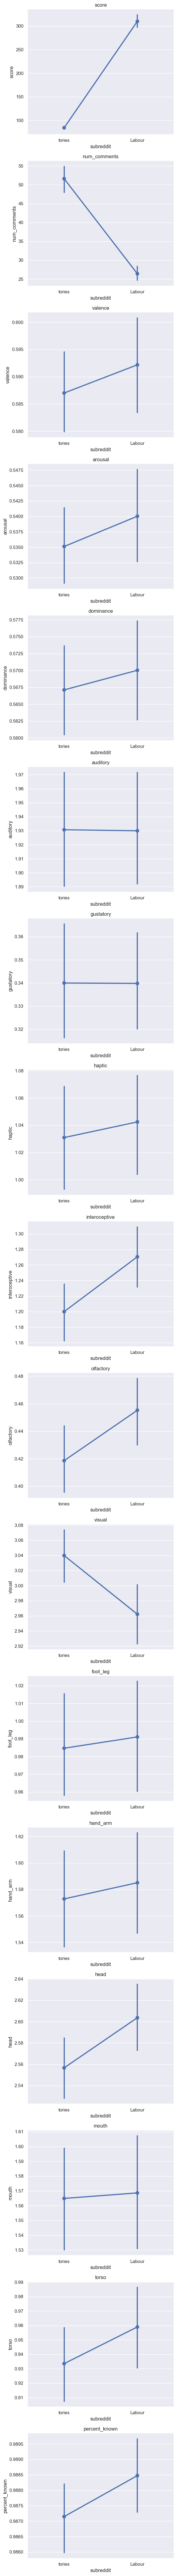

In [232]:
columns_to_plot = ['score',	'num_comments',	'valence',	'arousal', 'dominance', 'auditory',	'gustatory', 'haptic', 'interoceptive',	'olfactory', 'visual',	'foot_leg',	'hand_arm', 'head',	'mouth', 'torso', 'percent_known']  # Add more columns as needed

# Define the number of rows and columns for subplots
num_rows = len(columns_to_plot)
num_cols = 1  # Since each subplot will be a separate column

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, num_rows*5))

# Iterate over each column and create point plot
for i, column in enumerate(columns_to_plot):
    sns.pointplot(x='subreddit', y=column, data=lab_con, ax=axes[i])
    axes[i].set_title(column)  # Set title as column name
    
plt.tight_layout()  # Adjust layout
plt.show()

In [233]:
# Run the model again removing categories that are not significantly different between the 'tory' and 'Labour' groups. 
A = lab_con.drop(['index', 'title', 'user', 'text', 'url', 'subreddit', 'lemmatized_titles', 'binary', 'num_comments', 'score', 'auditory', 'gustatory', 'valence', 'arousal', 'dominance', 'haptic', 'foot_leg', 'hand_arm', 'mouth'], axis = 'columns')
b = lab_con['binary']

A_train, A_test, b_train, b_test, = train_test_split(A, b, test_size=0.2, random_state=42)

In [234]:
clf = LogisticRegression(random_state=42, max_iter=10000).fit(A_train, b_train)

In [235]:
preds = clf.predict(A_test)

In [236]:
print(classification_report(b_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       171
           1       0.53      0.47      0.50       153

    accuracy                           0.56       324
   macro avg       0.55      0.55      0.55       324
weighted avg       0.55      0.56      0.55       324



In [237]:
# Run the model again. This time it is the same as the first iteration except 'num_comments' and 'score' are removed.
H = lab_con.drop(['index', 'title', 'user', 'text', 'url', 'subreddit', 'lemmatized_titles', 'binary', 'num_comments', 'score'], axis = 'columns')
i = lab_con['binary']

H_train, H_test, i_train, i_test, = train_test_split(H, i, test_size=0.2, random_state=42)

In [238]:
clf = LogisticRegression(random_state=42, max_iter=10000).fit(H_train, i_train)

In [239]:
preds = clf.predict(H_test)

In [240]:
print(classification_report(i_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60       171
           1       0.53      0.46      0.49       153

    accuracy                           0.55       324
   macro avg       0.55      0.55      0.55       324
weighted avg       0.55      0.55      0.55       324



In [241]:
 S = lab_con.drop(['index', 'title', 'user', 'text', 'url', 'subreddit', 'lemmatized_titles', 'binary', 'num_comments', 'score', 'auditory', 'gustatory', 'foot_leg', 'hand_arm', 'mouth'], axis = 'columns')
t = lab_con['binary']

S_train, S_test, t_train, t_test, = train_test_split(S, t, test_size=0.2, random_state=42)

In [242]:
clf = LogisticRegression(random_state=42, max_iter=10000).fit(S_train, t_train)

In [243]:
preds = clf.predict(S_test)

In [244]:
print(classification_report(t_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       171
           1       0.53      0.47      0.50       153

    accuracy                           0.55       324
   macro avg       0.55      0.55      0.54       324
weighted avg       0.55      0.55      0.55       324



This model is only slightly better than chance at predicitng the affiliation of a particular tweet. It gets it correct 57% of the time for Labour and 53% of the time for Conservatives. Interestingly, the f1 score is higher for Labour (0.59) which indicated that the was in which labour supported communicate is more distinctive than Conservatives. 

## T-Tests on Unexpected Differences in Linguistic choices between Labour and Conservative Redditors.

In [245]:
import pingouin as pg

Point plots show that on average the valence, arousal, and dominance expressed in Labour associated subreddit comments were higher than in the Conservative (r/tories) subreddit. This would seem to indicate that at least within the confines of this dataset, that Labour comments are on average more emotive than Conservative comments. There is some evidence from the social and life sciences that liberal voters are more emotionally expressive, both in terms of how voters self-report their emotions and in terms of measurable physiological indicators of emotional expression (Peterson et al., 2018). Even though the results gained from the current small-scale NLP project would on the surface seem to chime true to the wider academic literature, a few points should cause hesitation in drawing new conclusions: 

We are taking the VAD as a model of emotion; it may not capture fully the extent of emotional possibilities.  
There is significant overlap in the spread of each ideology’s scores for valence, arousal, and dominance.  
When p-values are calculated to test the hypothesis, they are significantly above the 0.05 theshold for statistical significance.  
 

However, there did appear to be some significant and unexpected differences in the sensorimotor resonance of Labour comments vs Conservative comments that could point to fruitful areas of further research in a project with larger scope than the current one. Just from looking at the point plots, we can see significant ideological divergence within the following sensory categories: ‘interoceptive’, ‘olfactory’, ‘visual’, ‘head’, and ‘torso’.  

T-tests were performed to see if there was a statistically significant difference between the sensory resonance of each of these characteristics for each ideological group. The p-values are as follows: 

Interoceptive - 0.008389 

Haptic - 0.668731 

Olfactory – 0.033543 

Visual - 0.004803 

Head - 0.029798 

 

If we take the threshold for statistical significance to be p≤0.05 (there is a less than 5% chance that the difference is result is due to chance), then we can see that the interoceptive, olfactory, visual, and head tests meet this critera, but haptic does not. Of particular interest are the differences in interoceptive and visual language use, where there is a less than 1/119 chance and 1/208 chance respectively of the ideological difference in language use occurring due to chance.  

 

What could be the cause of such differences? There is some evidence to suggest that liberals (Labour loosely represents ‘Liberal’ in the current NLP study) are more ‘creative’ than their conservatively minded counterparts (Dollinger, 2007) which could correlate to more visual language deployed by Labour supporters vs Conservatives. Of course, ‘creativity’ is an ill-defined concept. In the Dollinger study creativity was assessed through participants producing a selection of drawings and photo essays, which many would agree to be a fairly narrow purview. As for ‘interoceptive’, perhaps it is true that due to the propensity for liberals to be more emotionally expressive, they are more likely to make reference to how they physically feel inside the body.  

In [246]:
pg.pairwise_tests(dv = 'interoceptive', between = 'subreddit', data = lab_con)

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

overflow encountered in _nct_sf

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

overflow encountered in _nct_cdf



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,subreddit,Labour,tories,False,True,2.639224,1615.885651,two-sided,0.008389,1.75,0.130926


In [247]:
pg.pairwise_tests(dv = 'haptic', between = 'subreddit', data = lab_con)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,subreddit,Labour,tories,False,True,0.427969,1615.963574,two-sided,0.668731,0.061,0.021233


In [248]:
pg.pairwise_tests(dv = 'olfactory', between = 'subreddit', data = lab_con)

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

overflow encountered in _nct_sf

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

overflow encountered in _nct_cdf



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,subreddit,Labour,tories,False,True,2.127347,1611.743378,two-sided,0.033543,0.524,0.105388


In [249]:
pg.pairwise_tests(dv = 'visual', between = 'subreddit', data = lab_con)

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

overflow encountered in _nct_sf

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

overflow encountered in _nct_cdf



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,subreddit,Labour,tories,False,True,-2.823865,1607.074967,two-sided,0.004803,2.878,-0.13979


In [250]:
pg.pairwise_tests(dv = 'head', between = 'subreddit', data = lab_con)

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

overflow encountered in _nct_sf

/Users/sarah/anaconda3/envs/sarah_nlp_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

overflow encountered in _nct_cdf



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,subreddit,Labour,tories,False,True,2.174693,1613.658373,two-sided,0.029798,0.58,0.107779


No AI tools were used in the preparation of this submission. Stackoverflow and similar resources, alongside the notebooks provided in class, have been used to provide source code for some elements of the project.  

 
This work contains **791** words not including hashed out comments or references. 

## References

Dollinger, S.J. (2007). Creativity and conservatism. Personality and Individual Differences, 43(5), pp.1025–1035. doi:https://doi.org/10.1016/j.paid.2007.02.023.

Lynott, D., Connell, L., Brysbaert, M., Brand, J. and Carney, J. (2019). The Lancaster Sensorimotor Norms: multidimensional measures of perceptual and action strength for 40,000 English words. Behavior Research Methods, 52(3), pp.1271–1291. doi:https://doi.org/10.3758/s13428-019-01316-z.

Peterson, J.C., Jacobs, C., Hibbing, J. and Smith, K. (2018). In your face. Politics and the Life Sciences, 37(1), pp.53–67. doi:https://doi.org/10.1017/pls.2017.13.